**Minor Project**

###Module Importing

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline
from sklearn.metrics import r2_score

import xgboost as xgb
from xgboost import plot_importance, plot_tree



### Data from the csv file is load into DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/minor project 1/bengaluru.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,11,2,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,17,9,2,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,16,7,2,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,15,5,2,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,5,1,88,0.0,1015,14,5,45,3


Columns are checked to know what is present in the dataset.

In [ ]:
pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)'


###Raw Data Profiling

In [ ]:
#!pip uninstall pandas-profiling

In [ ]:
#pip install pandas-profiling[notebook,html]

In [ ]:
#import pandas_profiling
#from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file


In [ ]:
#profile = ProfileReport(weather_df, title="Raw Weather Dataset", html={'style': {'full_width': True}}, sort=None)

In [ ]:
#profile.to_notebook_iframe()

###Working on the DataFrame

In [ ]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

Shape of DataFrame

In [ ]:
weather_df.shape

(96432, 24)

A quick overview of the DataFrame

In [ ]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,29.646093,19.336735,0.0,10.653484,5.900448,4.013751,46.094077,16.085418,25.002261,25.269662,24.422152,17.370966,34.847488,64.895460,0.077719,1010.554225,23.979810,9.274162,176.182097,12.448938
std,3.446427,2.773771,0.0,1.986738,0.851346,2.869923,31.249725,4.161604,4.586926,4.430811,4.516766,7.426413,28.391021,21.856869,0.385865,3.187016,4.540028,2.184726,89.443207,5.716769
min,18.000000,11.000000,0.0,4.200000,4.000000,1.000000,0.000000,-9.000000,12.000000,13.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,0.0,8.800000,5.000000,1.000000,18.000000,14.000000,21.000000,22.000000,21.000000,12.000000,9.000000,49.000000,0.000000,1008.000000,21.000000,10.000000,94.000000,8.000000
50%,29.000000,20.000000,0.0,11.600000,6.000000,5.000000,46.000000,18.000000,25.000000,25.000000,24.000000,17.000000,29.000000,68.000000,0.000000,1010.000000,23.000000,10.000000,163.000000,12.000000
75%,32.000000,21.000000,0.0,11.600000,6.000000,7.000000,73.000000,19.000000,28.000000,28.000000,27.000000,22.000000,54.000000,83.000000,0.000000,1013.000000,27.000000,10.000000,262.000000,16.000000
max,40.000000,28.000000,0.0,12.900000,8.000000,10.000000,100.000000,25.000000,43.000000,43.000000,42.000000,53.000000,100.000000,100.000000,16.900000,1021.000000,40.000000,20.000000,360.000000,41.000000


Null Check in DataFrame

In [ ]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

Taking out relavent data.

In [ ]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,27,12,2,91,14,11.6,18,0.0,1014,8
2009-01-01 01:00:00,27,12,2,93,14,11.6,17,0.0,1014,6
2009-01-01 02:00:00,27,12,2,94,13,11.6,16,0.0,1014,4
2009-01-01 03:00:00,27,12,2,96,12,11.6,15,0.0,1014,3
2009-01-01 04:00:00,27,12,1,88,14,11.6,18,0.0,1015,3


In [ ]:
weather_df_num.shape

(96432, 10)

In [ ]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

## Complete Data Plot

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

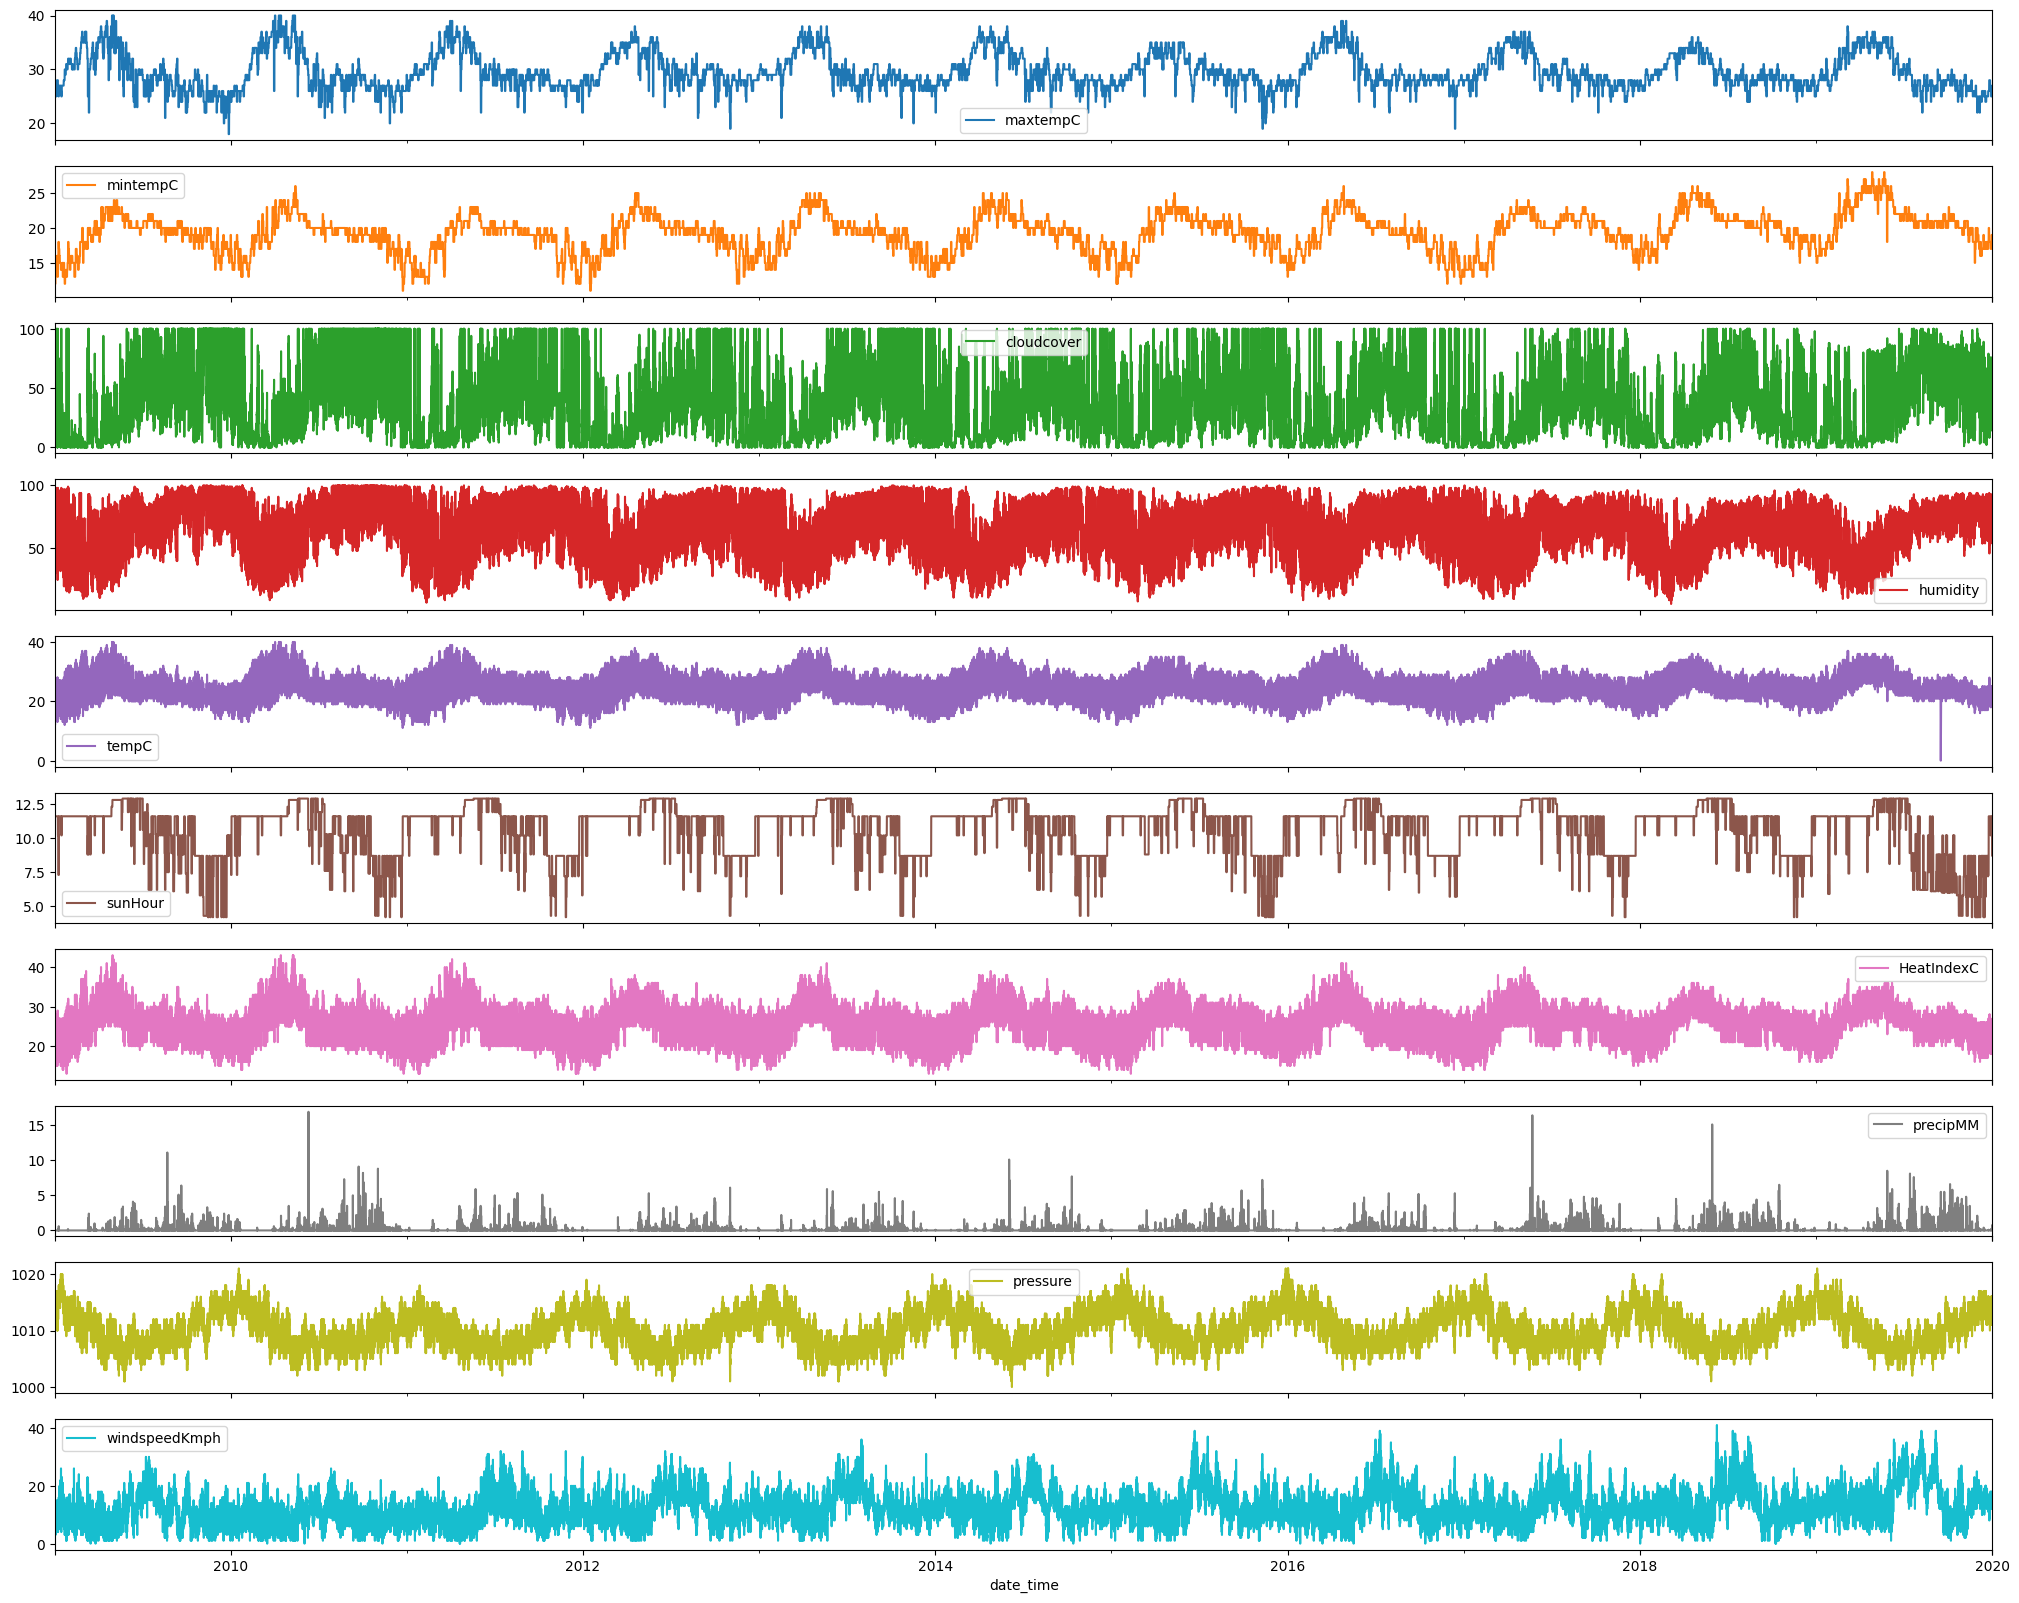

In [ ]:
weather_df_num.plot(subplots=True, figsize=(25,20))

## Data Plot From year 2019 to 2020.

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

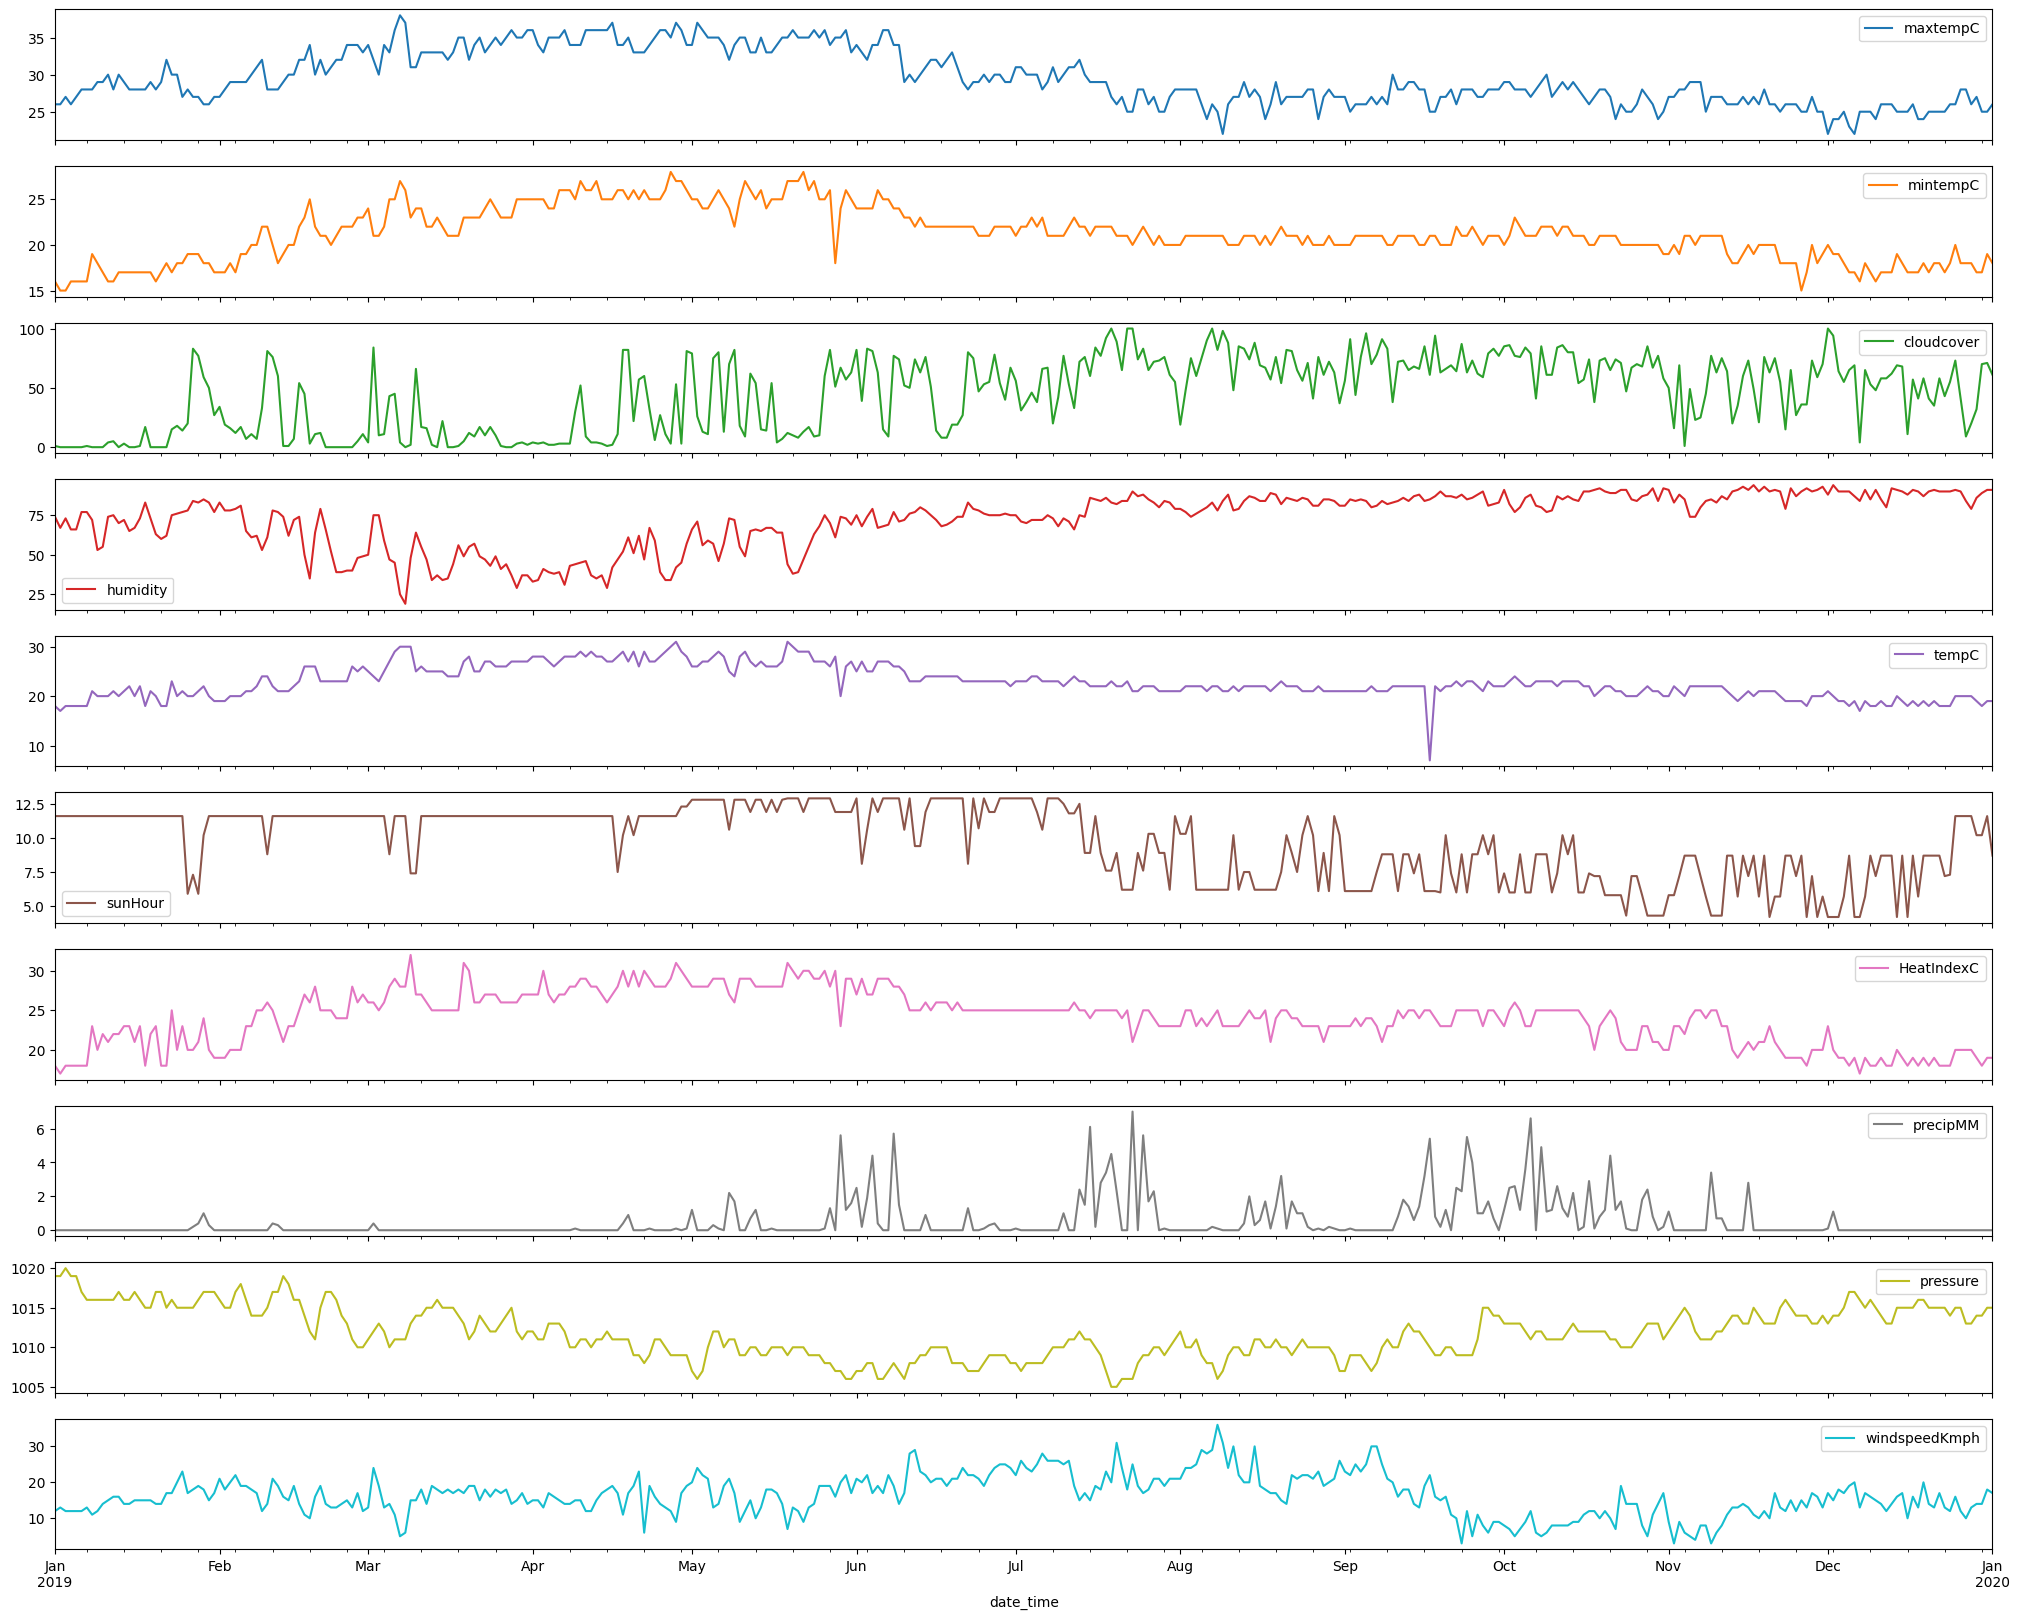

In [ ]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

## Histogram of each column to get the approximate curve


array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

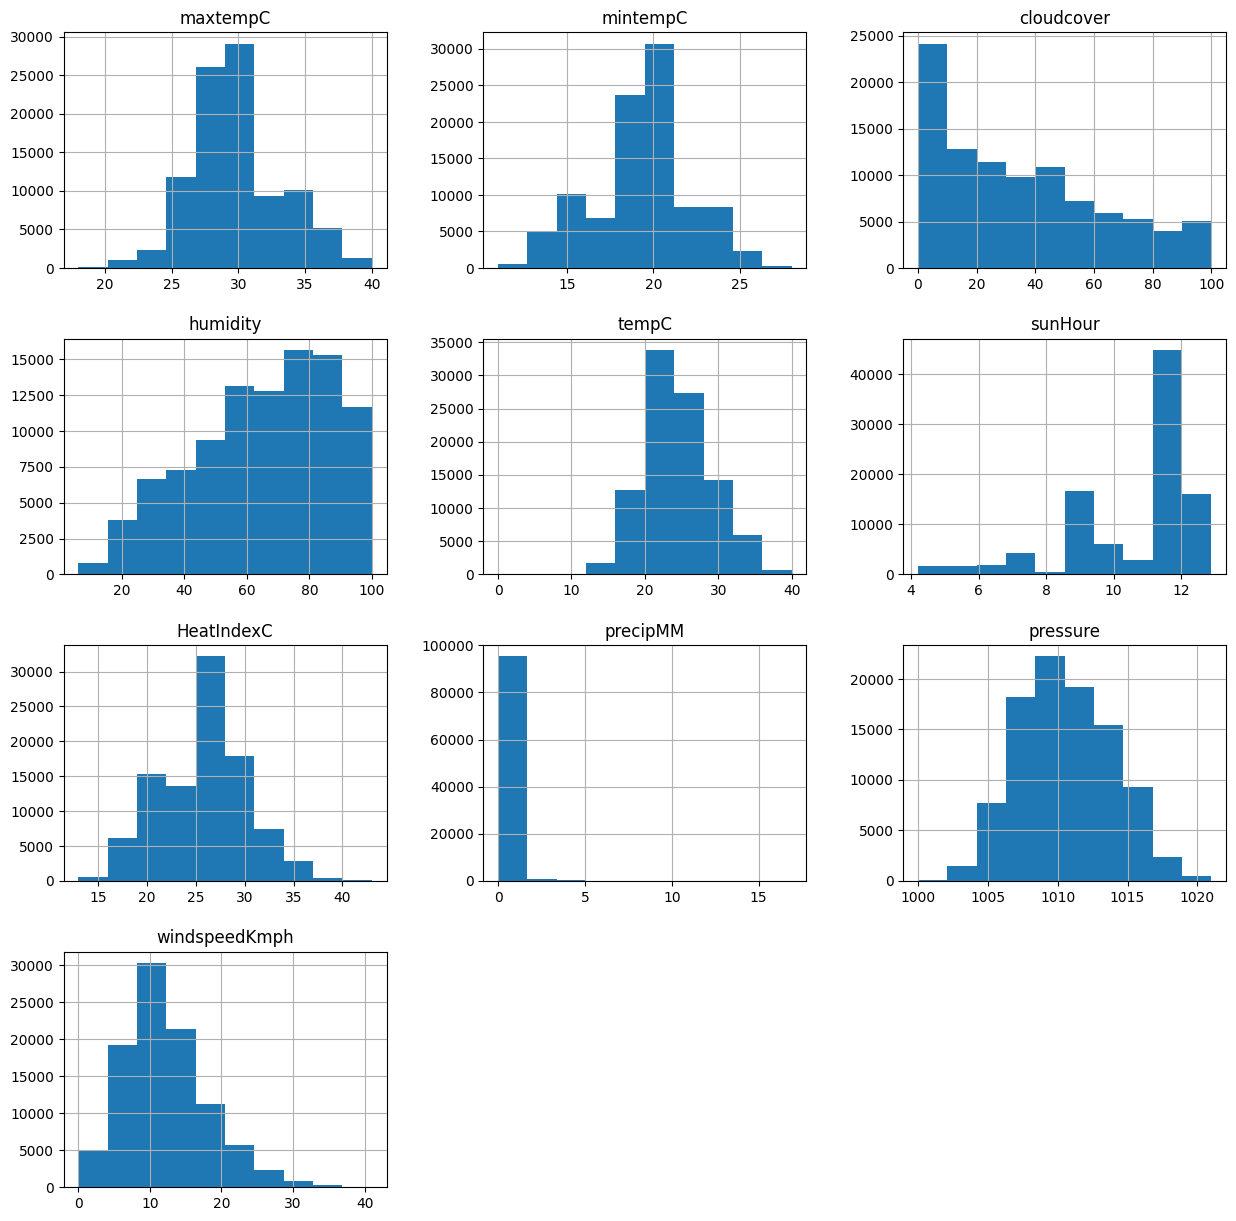

In [ ]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [ ]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,26,16,1,74,18,11.6,18,0.0,1019,12
2019-01-01 01:00:00,26,16,1,78,18,11.6,18,0.0,1019,12
2019-01-01 02:00:00,26,16,2,82,17,11.6,17,0.0,1019,11
2019-01-01 03:00:00,26,16,3,85,17,11.6,17,0.0,1019,10
2019-01-01 04:00:00,26,16,3,83,17,11.6,17,0.0,1019,10


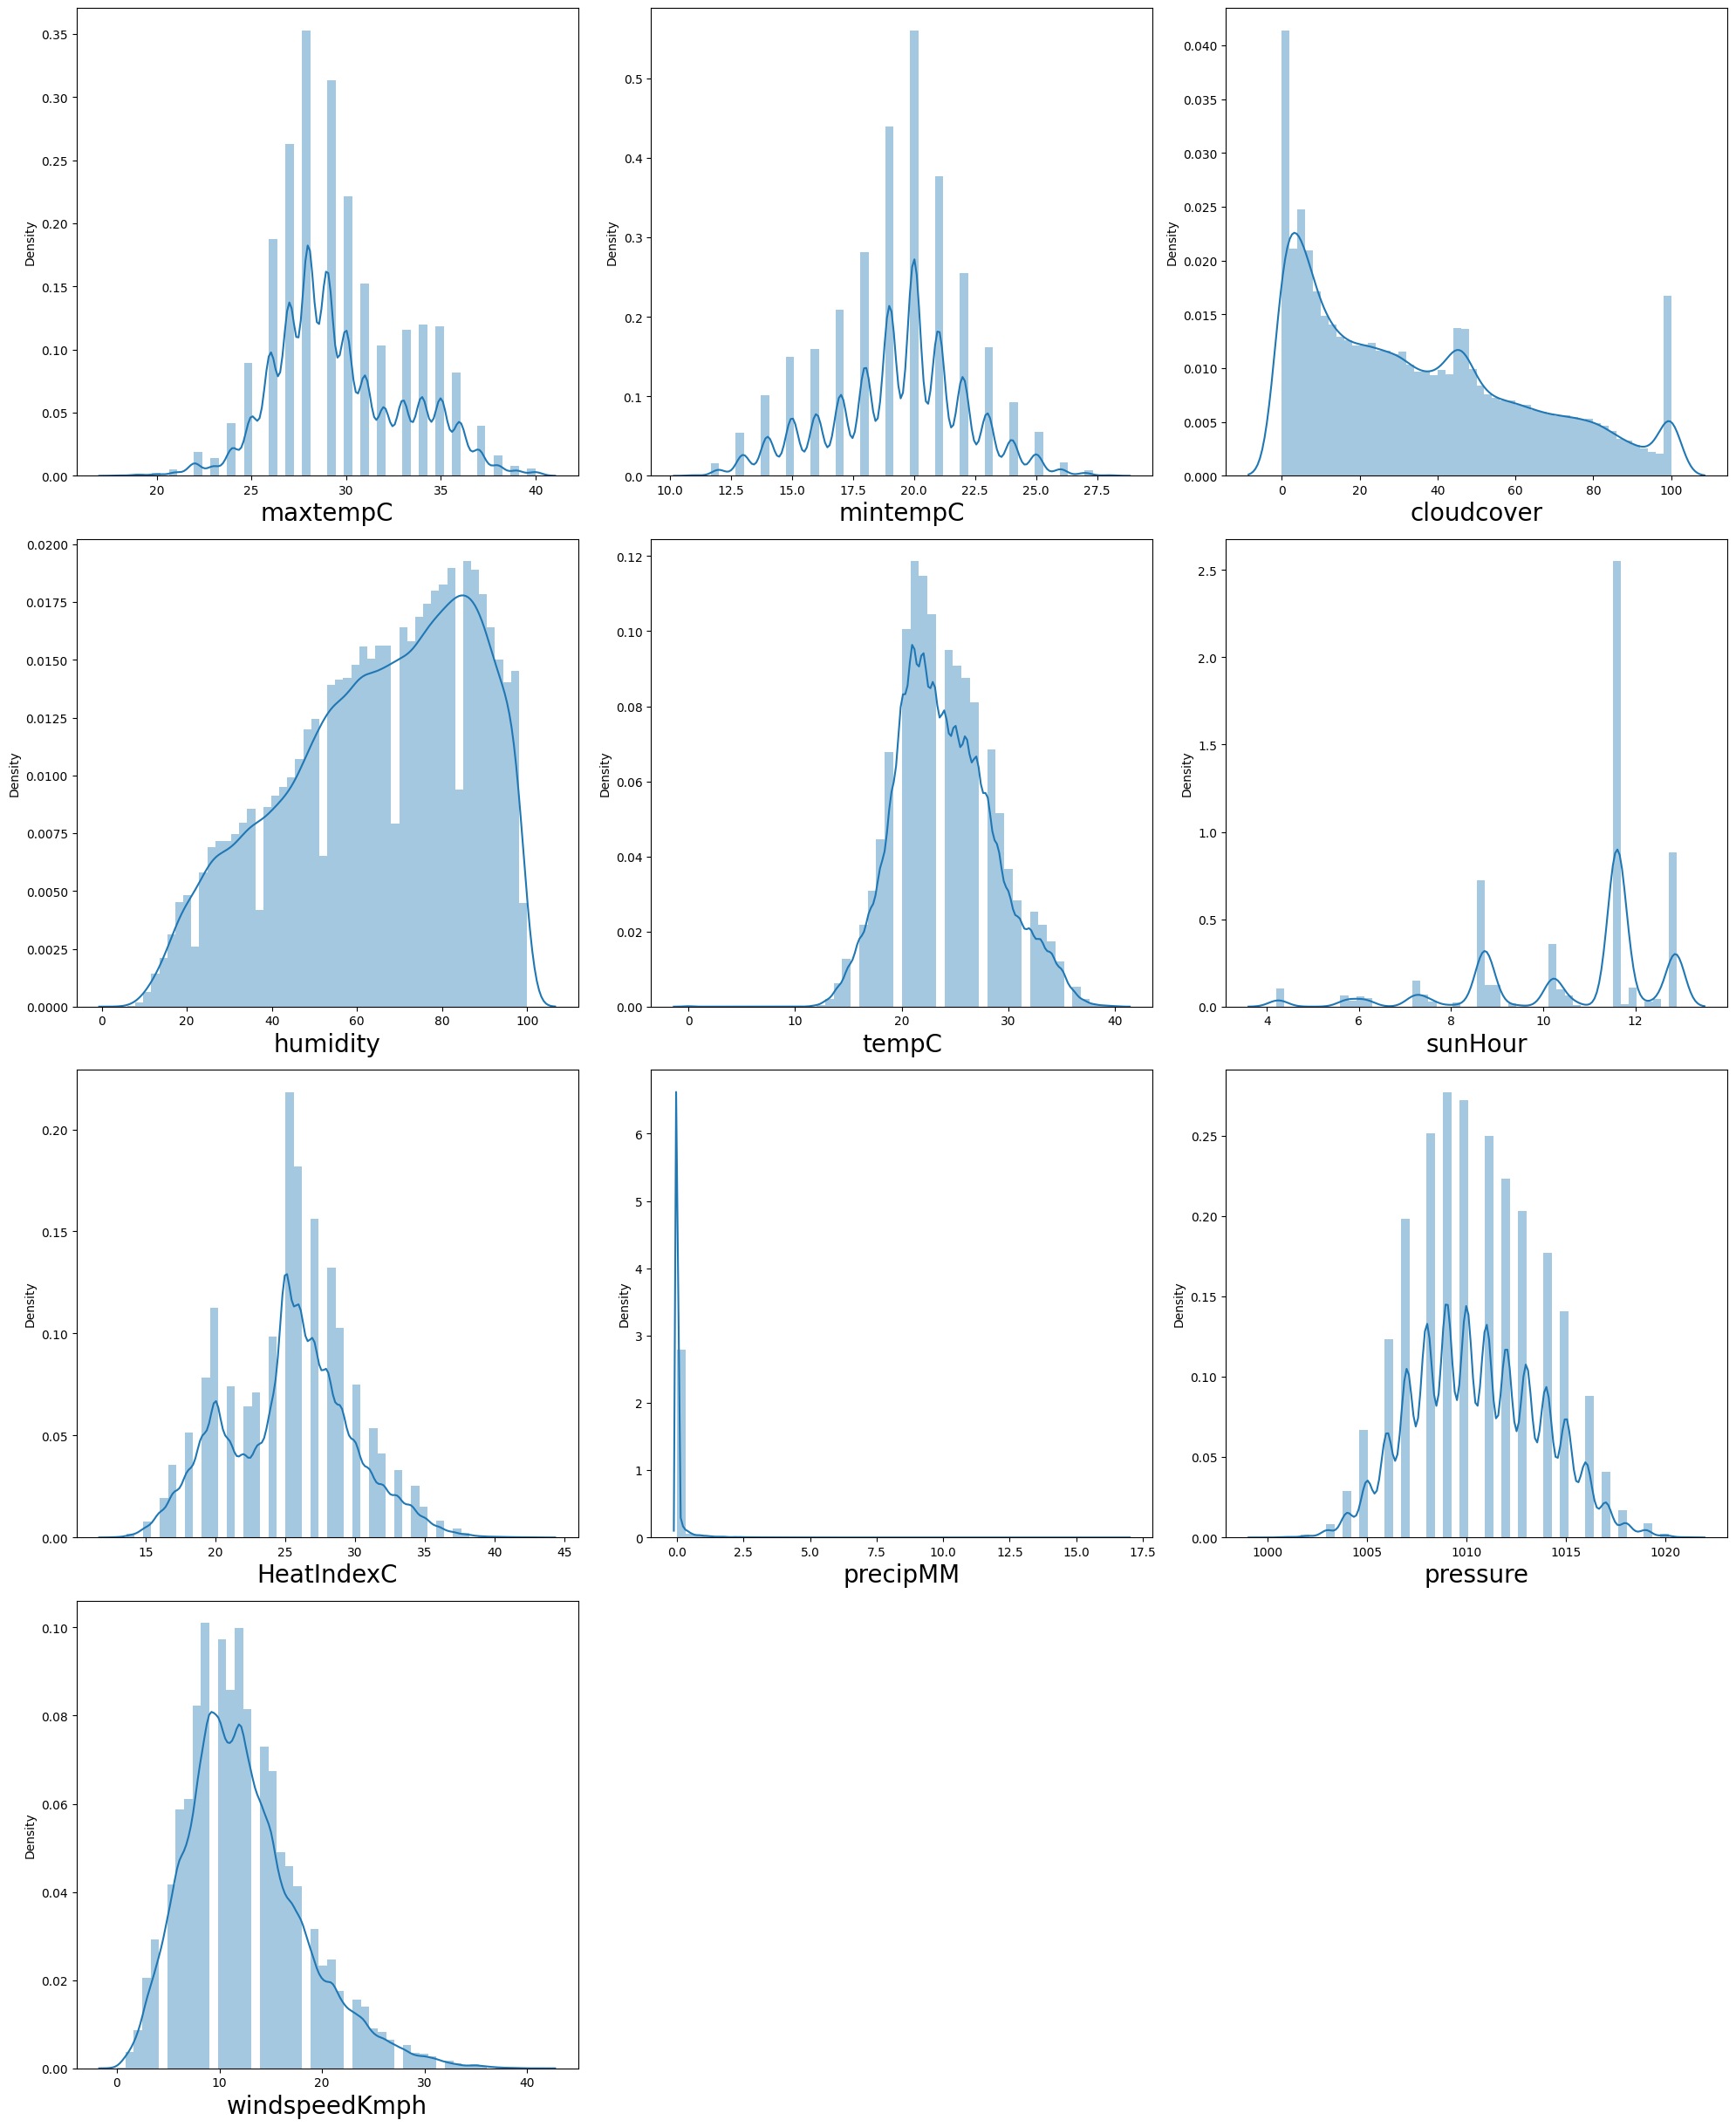

In [ ]:

plt.figure(figsize=(20,30),facecolor='White')
plotnumber = 1

for column in weather_df_num:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(weather_df_num[column])
        plt.xlabel(column, fontsize=20)
        plotnumber+=1
        plt.tight_layout()

###Prepared Data Profiling

In [ ]:
#profile = ProfileReport(weather_df_num, title="Weather_Dataset", html={'style': {'full_width': True}}, sort=None)

In [ ]:
#profile.to_notebook_iframe()

##DATA Spliting
Train Test Split(4:1)

In [ ]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

***Our dataset is prepared and it is ready to be fed to the model for training.***


weather_x is training data set and weather_y is used to predict and then compared to weather_x.

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [ ]:
train_X.shape

(77145, 9)

In [ ]:
train_y.shape

(77145,)

In [ ]:
train_y.head()

date_time
2012-03-13 07:00:00    26
2009-11-05 21:00:00    20
2017-10-11 22:00:00    23
2019-06-08 11:00:00    29
2019-03-06 05:00:00    26
Name: tempC, dtype: int64

# Multiple Linear Regression

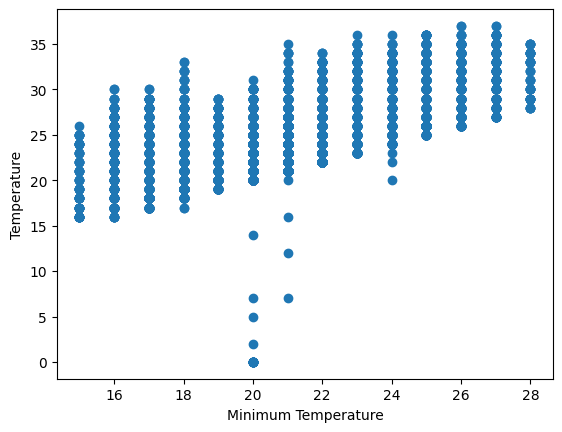

In [ ]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

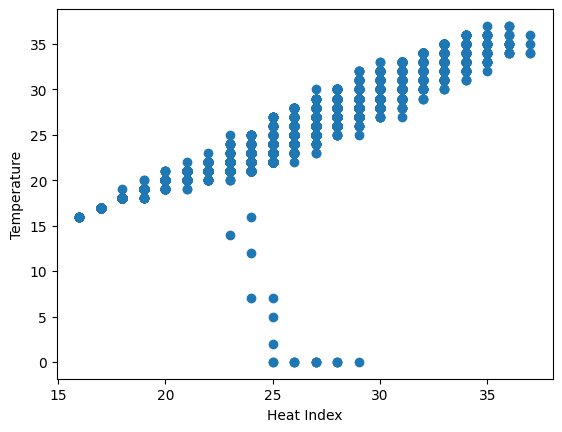

In [ ]:
plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

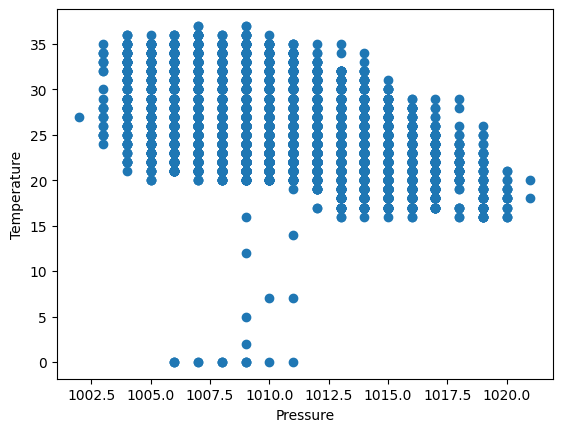

In [ ]:
plt.scatter(weth.pressure, weth.tempC)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

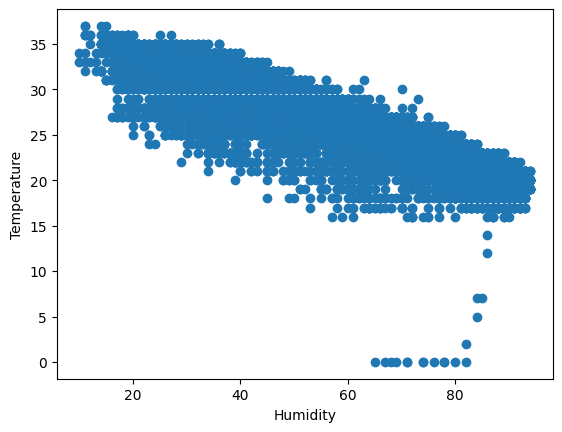

In [ ]:
plt.scatter(weth.humidity, weth.tempC)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

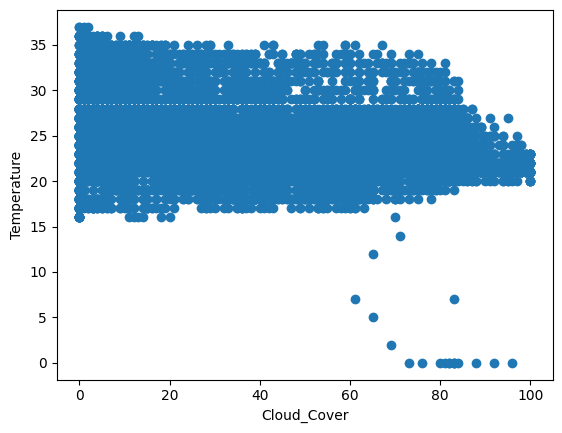

In [ ]:
plt.scatter(weth.cloudcover, weth.tempC)
plt.xlabel("Cloud_Cover")
plt.ylabel("Temperature")
plt.show()

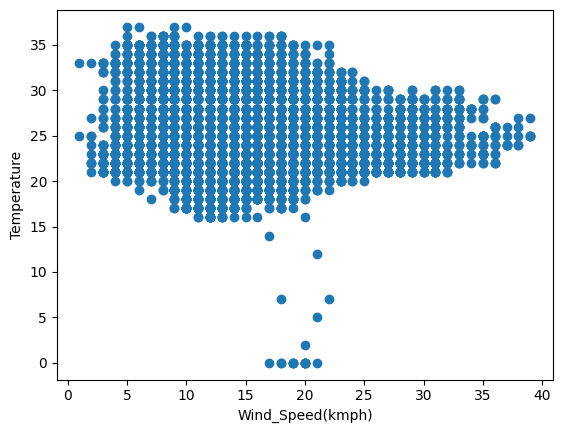

In [ ]:
plt.scatter(weth.windspeedKmph, weth.tempC)
plt.xlabel("Wind_Speed(kmph)")
plt.ylabel("Temperature")
plt.show()

In [ ]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
prediction = model.predict(test_X)

In [ ]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.7434642677557076

In [ ]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.95


In [ ]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,26,26.21,-0.21
2015-11-04 20:00:00,21,19.80,1.20
2015-09-21 09:00:00,27,26.35,0.65
2017-02-16 11:00:00,29,27.40,1.60
2012-07-21 01:00:00,20,19.21,0.79
...,...,...,...
2019-03-30 09:00:00,29,28.35,0.65
2015-11-12 12:00:00,27,27.05,-0.05
2019-12-31 05:00:00,19,18.11,0.89


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.74
Residual sum of squares (MSE): 1.12
R2-score: 0.95


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.4076407251862222

In [ ]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.96


In [ ]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,26,26.0,0.0
2015-11-04 20:00:00,21,20.0,1.0
2015-09-21 09:00:00,27,27.0,0.0
2017-02-16 11:00:00,29,29.0,0.0
2012-07-21 01:00:00,20,20.0,0.0
...,...,...,...
2019-03-30 09:00:00,29,28.0,1.0
2015-11-12 12:00:00,27,27.0,0.0
2019-12-31 05:00:00,19,19.0,0.0


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.41
Residual sum of squares (MSE): 0.83
R2-score: 0.96


#Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [ ]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.3678825877002888

In [ ]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.98


In [ ]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,26,25.82,0.18
2015-11-04 20:00:00,21,20.55,0.45
2015-09-21 09:00:00,27,26.87,0.13
2017-02-16 11:00:00,29,29.09,-0.09
2012-07-21 01:00:00,20,20.00,0.00
...,...,...,...
2019-03-30 09:00:00,29,28.54,0.46
2015-11-12 12:00:00,27,26.95,0.05
2019-12-31 05:00:00,19,19.00,0.00


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.37
Residual sum of squares (MSE): 0.41
R2-score: 0.98


# XGBOOST

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_X, train_y,
        eval_set=[(train_X, train_y), (test_X, test_y)],
        early_stopping_rounds=50,
       verbose=True)

[0]	validation_0-rmse:16.75555	validation_1-rmse:16.75582
[1]	validation_0-rmse:11.74523	validation_1-rmse:11.74556
[2]	validation_0-rmse:8.24009	validation_1-rmse:8.24245
[3]	validation_0-rmse:5.79018	validation_1-rmse:5.79587
[4]	validation_0-rmse:4.08046	validation_1-rmse:4.09114
[5]	validation_0-rmse:2.89163	validation_1-rmse:2.90870
[6]	validation_0-rmse:2.07016	validation_1-rmse:2.09551
[7]	validation_0-rmse:1.51115	validation_1-rmse:1.54737
[8]	validation_0-rmse:1.13751	validation_1-rmse:1.18780
[9]	validation_0-rmse:0.89764	validation_1-rmse:0.96267
[10]	validation_0-rmse:0.75056	validation_1-rmse:0.82889
[11]	validation_0-rmse:0.66349	validation_1-rmse:0.75314
[12]	validation_0-rmse:0.60983	validation_1-rmse:0.70346
[13]	validation_0-rmse:0.57045	validation_1-rmse:0.66335
[14]	validation_0-rmse:0.55577	validation_1-rmse:0.65160
[15]	validation_0-rmse:0.53939	validation_1-rmse:0.64003
[16]	validation_0-rmse:0.53298	validation_1-rmse:0.63495
[17]	validation_0-rmse:0.52854	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
prediction4=reg.predict(test_X)
np.mean(np.absolute(prediction4-test_y))

0.3697044028831368

In [ ]:
print('Variance score: %.2f' % reg.score(test_X, test_y))

Variance score: 0.99


In [ ]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,26,25.790001,0.209999
2015-11-04 20:00:00,21,20.610001,0.389999
2015-09-21 09:00:00,27,26.670000,0.330000
2017-02-16 11:00:00,29,29.040001,-0.040001
2012-07-21 01:00:00,20,20.010000,-0.010000
...,...,...,...
2019-03-30 09:00:00,29,28.580000,0.420000
2015-11-12 12:00:00,27,26.990000,0.010000
2019-12-31 05:00:00,19,18.959999,0.040001


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction4 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )

Mean absolute error: 0.37
Residual sum of squares (MSE): 0.29
R2-score: 0.99


#Save ML Models

###Multiple Linear Regression

In [ ]:
import pickle
Pkl_Filename = "Pickle_MLL_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_MLL_Model = pickle.load(file)

Pickled_MLL_Model

LinearRegression()

In [ ]:
MLL_score = Pickled_MLL_Model.score(test_X, test_y)
# Print the Score
print("Test score: {0:.2f} %".format(100 * MLL_score))

# Predict the Labels using the reloaded Model
Ypredict_MLL = Pickled_MLL_Model.predict(test_X)

Test score: 94.59 %


###DTR

In [ ]:
import pickle
Pkl_DTR_Filename = "Pickle_DTR_Model.pkl"

with open(Pkl_DTR_Filename, 'wb') as file:
    pickle.dump(regressor, file)

In [ ]:
with open(Pkl_DTR_Filename, 'rb') as file:
    Pickled_DTR_Model = pickle.load(file)

Pickled_DTR_Model

DecisionTreeRegressor(random_state=0)

In [ ]:
DTR_score = Pickled_DTR_Model.score(test_X, test_y)
# Print the Score
print("Test score: {0:.2f} %".format(100 * DTR_score))

# Predict the Labels using the reloaded Model
Ypredict_DTR = Pickled_DTR_Model.predict(test_X)

Test score: 96.00 %


###RFR

In [ ]:
import pickle
Pkl_RFR_Filename = "Pickle_RFR_Model.pkl"

with open(Pkl_RFR_Filename, 'wb') as file:
    pickle.dump(regr, file)

In [ ]:
with open(Pkl_RFR_Filename, 'rb') as file:
    Pickled_RFR_Model = pickle.load(file)

Pickled_RFR_Model

RandomForestRegressor(max_depth=90, random_state=0)

In [ ]:
RFR_score = Pickled_RFR_Model.score(test_X, test_y)
# Print the Score
print("Test score: {0:.2f} %".format(100 * RFR_score))

# Predict the Labels using the reloaded Model
Ypredict_RFR = Pickled_RFR_Model.predict(test_X)

Test score: 98.03 %


###XGBOOST

In [ ]:
import pickle
Pkl_XGB_Filename = "Pickle_XGB_Model.pkl"

with open(Pkl_XGB_Filename, 'wb') as file:
    pickle.dump(reg, file)

In [ ]:
with open(Pkl_XGB_Filename, 'rb') as file:
    Pickled_XGB_Model = pickle.load(file)

Pickled_XGB_Model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
XGB_score = Pickled_XGB_Model.score(test_X, test_y)
# Print the Score
print("Test score: {0:.2f} %".format(100 * XGB_score))

# Predict the Labels using the reloaded Model
Ypredict_XGB = Pickled_XGB_Model.predict(test_X)

Test score: 98.63 %


##Final Accuracy Scores

In [ ]:
print("-----The Accuracy Scores-----")
print("Multiplte Linear Regression : ",round(MLL_score*100,3))
print("Descision Tree Regression : ",round(DTR_score*100,3))
print("Random Forest Regression : ",round(RFR_score*100,3))
print("XGBoost : ",round(XGB_score*100,3))


-----The Accuracy Scores-----
Multiplte Linear Regression :  94.588
Descision Tree Regression :  96.0
Random Forest Regression :  98.031
XGBoost :  98.626
